In [9]:
import numpy as np
import math
import pandas as pd

from sklearn.model_selection import KFold
from tscv import GapKFold

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

Test the TSCV GapKFold : a splitting technique for train/test splits from TSCV library.<br>
TSCV is an open-source library derived from scikit-learn.<br>
http://www.zhengwenjie.net/tscv/

In [10]:
df_features = pd.read_csv('../../data/intermediate/building_1176/features_clean_1176.csv',
                        parse_dates=['timestamp'], index_col=['timestamp'])
df_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7751 entries, 2016-01-04 02:00:00 to 2016-12-31 11:00:00
Data columns (total 7 columns):
day_of_week                     7751 non-null int64
dew_temperature_ma_24H          7751 non-null float64
air_temperature                 7751 non-null float64
wind_speed_ma_24H               7751 non-null float64
precip_depth_1_hr_ma_24H        7751 non-null float64
sea_level_pressure_shift_10H    7751 non-null float64
meter_reading_trend             7751 non-null float64
dtypes: float64(6), int64(1)
memory usage: 484.4 KB


In [11]:
df_features.head()

,day_of_week,dew_temperature_ma_24H,air_temperature,wind_speed_ma_24H,precip_depth_1_hr_ma_24H,sea_level_pressure_shift_10H,meter_reading_trend
timestamp,,,,,,,
2016-01-04 02:00:00,0,-7.483333,-5.0,5.166667,0.0,1027.2,89.470750
2016-01-04 03:00:00,0,-7.462500,-5.0,5.058333,0.0,1027.8,92.008917
2016-01-04 05:00:00,0,-7.512500,-6.1,4.800000,0.0,1027.1,97.074187
2016-01-04 06:00:00,0,-7.579167,-6.7,4.712500,0.0,1027.3,99.024417
2016-01-04 07:00:00,0,-7.670833,-7.2,4.541667,0.0,1027.5,100.466500


In [125]:
kf = KFold(n_splits=5)
kf_sets = []
for train_test_indexes in kf.split(df_features):
    kf_sets.append(train_test_indexes)

In [126]:
kf_sets

[(array([1551, 1552, 1553, ..., 7748, 7749, 7750]),
  array([   0,    1,    2, ..., 1548, 1549, 1550])),
 (array([   0,    1,    2, ..., 7748, 7749, 7750]),
  array([1551, 1552, 1553, ..., 3098, 3099, 3100])),
 (array([   0,    1,    2, ..., 7748, 7749, 7750]),
  array([3101, 3102, 3103, ..., 4648, 4649, 4650])),
 (array([   0,    1,    2, ..., 7748, 7749, 7750]),
  array([4651, 4652, 4653, ..., 6198, 6199, 6200])),
 (array([   0,    1,    2, ..., 6198, 6199, 6200]),
  array([6201, 6202, 6203, ..., 7748, 7749, 7750]))]

In [128]:
df_fold_1 = pd.DataFrame(index=df_features.index)
df_fold_1['val']=0
df_fold_1['which_set'] = 'none'
train_index, test_index = kf_sets[1]
df_fold_1.loc[df_features.index[train_sets[1]], 'which_set'] = 'train'
df_fold_1.loc[df_features.index[test_index[1]], 'which_set'] = 'train'
df_fold_1.head()

,val,which_set
timestamp,,
2016-01-04 02:00:00,0,train
2016-01-04 03:00:00,0,train
2016-01-04 05:00:00,0,train
2016-01-04 06:00:00,0,train
2016-01-04 07:00:00,0,train


In [131]:
# TODO fonction plot_fold, function plot_split = for fold in folds plot_fold(fold)
# TODO refactor duplicate code
# TODO add colorMap for hue

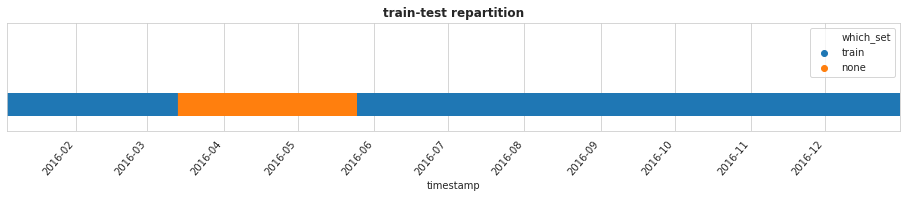

In [130]:
fig = plt.figure(figsize=(16, 2))
with sns.axes_style("whitegrid"):
    ax = sns.scatterplot(
        x='timestamp', 
        y='val',
        hue='which_set', 
        data=df_fold_1.reset_index(inplace=False),
        edgecolor=None,
        marker=',',
        s=500
    )
    ax.set_ylim(-0.5,1.5) # TODO max min
    ax.set_xlim(df_fold_1.index.min(), df_fold_1.index.max())
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_title('train-test repartition', fontweight="bold")
    plt.xticks(rotation=50, horizontalalignment='right')

In [120]:
# gap ~ two weeks.
gap = 24*7*2

kf = GapKFold(n_splits=5, gap_before=gap, gap_after=gap)
gap_sets = []
for train_test_indexes in kf.split(df_features):
    gap_sets.append(train_test_indexes)

In [121]:
gap_sets

[(array([1887, 1888, 1889, ..., 7748, 7749, 7750]),
  array([   0,    1,    2, ..., 1548, 1549, 1550])),
 (array([   0,    1,    2, ..., 7748, 7749, 7750]),
  array([1551, 1552, 1553, ..., 3098, 3099, 3100])),
 (array([   0,    1,    2, ..., 7748, 7749, 7750]),
  array([3101, 3102, 3103, ..., 4648, 4649, 4650])),
 (array([   0,    1,    2, ..., 7748, 7749, 7750]),
  array([4651, 4652, 4653, ..., 6198, 6199, 6200])),
 (array([   0,    1,    2, ..., 5862, 5863, 5864]),
  array([6201, 6202, 6203, ..., 7748, 7749, 7750]))]

In [122]:
df_fold_1 = pd.DataFrame(index=df_features.index)
df_fold_1['val']=0
df_fold_1['which_set'] = 'none'
train_index, test_index = gap_sets[1]
df_fold_1.loc[df_features.index[train_index], 'which_set'] = 'train'
df_fold_1.loc[df_features.index[test_index], 'which_set'] = 'test'
df_fold_1.head()

,val,which_set
timestamp,,
2016-01-04 02:00:00,0,train
2016-01-04 03:00:00,0,train
2016-01-04 05:00:00,0,train
2016-01-04 06:00:00,0,train
2016-01-04 07:00:00,0,train


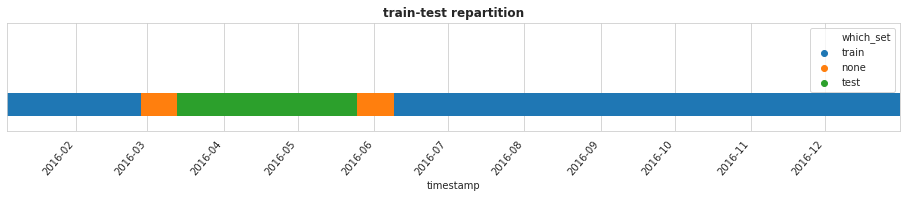

In [123]:
fig = plt.figure(figsize=(16, 2))
with sns.axes_style("whitegrid"):
    ax = sns.scatterplot(
        x='timestamp', 
        y='val',
        hue='which_set', 
        data=df_fold_1.reset_index(inplace=False),
        edgecolor=None,
        marker=',',
        s=500
    )
    ax.set_ylim(-0.5,1.5) # TODO max min
    ax.set_xlim(df_fold_1.index.min(), df_fold_1.index.max())
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_title('train-test repartition', fontweight="bold")
    plt.xticks(rotation=50, horizontalalignment='right')